In [1]:
infinity = float('infinity') # membuat nilai tak hingga
nama = 'Nama'
Node_awal = 'E' #node awal
node_tujuan = 'B' #node tujuan

lokasi = { # random example graph
 'A': {'B': 4, 'C': 2},
 'B': {'A': 4, 'C': 1, 'D': 5},
 'C': {'A': 2, 'B': 1, 'D': 8, 'E': 10},
 'D': {'B': 5, 'C': 8, 'E': 2, 'Z': 6},
 'E': {'C': 10,'D': 2, 'Z': 3},
 'Z': {'D': 6, 'E': 3}
}

jarak = {} #menampung semua jarak atau bobot yang melewati nodes. default setting inf/tak hingga
nodes = {} #menabhakan Nodes dalam inputan diatas
for node in lokasi: #untuk membuat iterasi untuk mengisi setiap jarak dan nodes
    jarak[node] = infinity #menandai semua bobot dengan infinity/tak hingga
    nodes[node] = {} #setiap nodes anggapannya masih belum terhubung satu sama lain


jarak[Node_awal] = 0 #menandai jarak node pertama dengan 0


def graphShortestPath(jarak, not_check): #membuat fungsi dengan paramater jarak dan not_check untuk\
    jarak_terpendek = infinity #mengganti variabel tak hingga
    cheapest_node = "" #memasukkan jarak terpendek dari perbandingan didalm iterasi
    for node in jarak:
        if node in not_check and jarak[node] <= jarak_terpendek: #membandingkan untuk mencari nilai terkecil
            jarak_terpendek = jarak[node] #jika jaraknya lebih kecil maka jarak terpendek jarak node tersebut
            cheapest_node = node #menambahkan node yang terpendek
            print(cheapest_node)
    return cheapest_node #mengembalikan jarak terpendek


# Algorithm: Dijkstra
not_check = [node for node in jarak] #mengakses setiap node untuk nanti dicek/dibandingkan
node = graphShortestPath(jarak, not_check)

while not_check: #melakukan iterasi untuk mengecek sampai semua node telah diperiksa. Pada setiap iterasi
    dist = jarak[node] # jarak node saat ini (dist) diakses dari jarak
    child_dist = lokasi[node] # jarak dari node saat ini (child_dist) diakses dari lokasi
    for c in child_dist:
        if jarak[c] > dist + child_dist[c]: #Jika jarak ke anak tertentu lebih besar daripada jarak saat ini ditambah jarak dari anak tersebut ke node saat ini
            jarak[c] = dist + child_dist[c] # maka jarak tersebut diperbarui.
            nodes[c] = node  #node yang menghasilkan jarak terpendek diatur sebagai nodes[c].
    not_check.pop(not_check.index(node)) #Setelah itu, node saat ini dihapus dari not_check .
    node = graphShortestPath(jarak, not_check) #node baru yang memiliki jarak terpendek diambil menggunakan graphShortestPath.

if jarak[node_tujuan] < infinity: #kemudian dilakukan pengujian,apakah  jarak kurang dari infinity?
    alur = [node_tujuan] #Jika True maka alur dibuat dari node_tujuan ke node_awal dengan memperoleh node dari nodes
    i = 0 #inisialisasi awal untuk menjumlahkan
    while Node_awal not in alur: #kemudian dilakukanlah proses iterasi untuk kalkulasi dari setiap node yang tidak berada dalam alur
        alur.append(nodes[alur[i]])
        i+= 1 # increment atau penambahan
else:
    print('Maaf, alur yang Anda cari tidak ditemukan.') #Jika jarak tidak kurang dari infinity, artinya tidak ada jalur yang ditemukan

jalur=alur[::-1] #Terakhir, jalur diubah urutan elemennya menggunakan [::-1]
total=jarak[node_tujuan] #untuk mendapatkan urutan yang benar, dan total adalah jarak akhir dari node_awal ke node_tujuan
print('Jalur Terpendek yang dapat dilalui',jalur,'dengan total jarak=',total) #Kemudian tampilkan total dan jalur dari hasil dari algoritma djikstra tersebut

A
B
C
D
E
A
B
C
D
A
B
Z
A
B
A
C
A
Jalur Terpendek yang dapat dilalui ['E', 'D', 'B'] dengan total jarak= 7


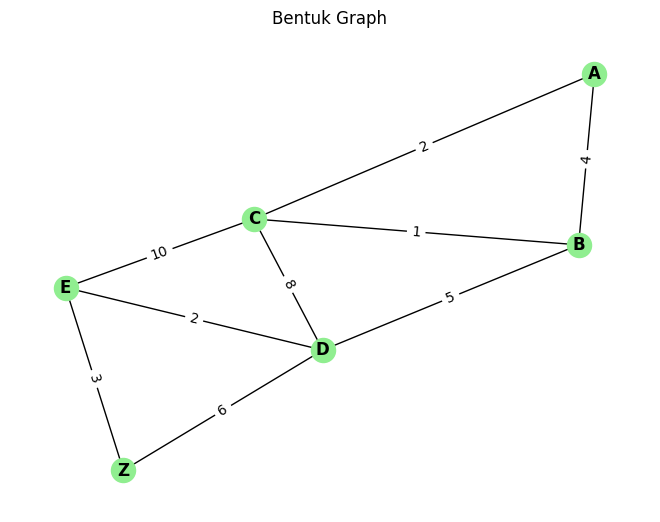

Dengan jalur terpendek, ['E', 'D', 'B']


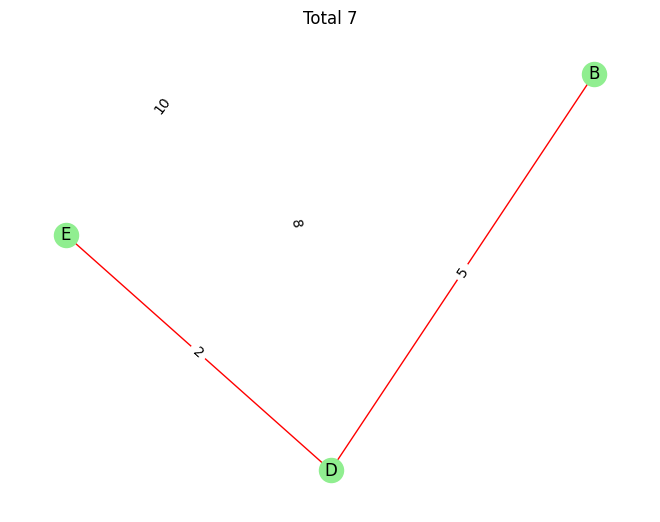

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.Graph() #deklarasi graph pertama
G2=nx.Graph() #deklarasi graph kedua

for i in lokasi: #untuk mengambil key dari dict, untuk membuat graph pertama
    for j in lokasi[i]: #untuk mengambil value didalam key
        G.add_edge(i, j, weight=lokasi[i][j]) #menambah vertex, edge, dan bobot

pairs = [] #menyimpan node/vertex untuk graph kedua
for i in range(len(jalur) - 1): #membuat graph kedua
    pairs.append([jalur[i], jalur[i+1]]) #menambakan setiap 2 nodes dalam 1 list --> [['A','B'],['B','C']...dst] bisa diprint(pairs) untuk melihatnya


# G.add_weighted_edges_from(G)
pos = nx.spring_layout(G) #membuat bentuk pola graph
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='lightgreen') #menampilkan graph
edge_weight = nx.get_edge_attributes(G, 'weight') #menambahkan atribut/bobot untuk nanti bisa divisualisasikan
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weight) #menambahkan visualisasi bobot dalam edges
plt.title(f'Bentuk Graph') #menampilkan judul
plt.show() #menampilkan visualisasi graph menggunakan matplotlib


G2.add_nodes_from(jalur) #menambahkan nodes baru dengan menggunakan hasil dari djikstra
G2.add_edges_from(pairs) #menambahkan edges dengan menyambungkan 2 nodes
nx.draw(G2, pos, with_labels=True, node_color='lightgreen', edge_color='red') #menampilkan graph kedua
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weight) #menambahkan visualisasi bobot dalam edges dengan menggunakan weight atau bobot dari graph sebelumnya baris #16
plt.title(f'Total {total}') #sama judul
print('Dengan jalur terpendek,', jalur) #menunjukkan urutan2 nodes yang terpendek dan dilewatinya
plt.show() #menampilkn visualisasi graph kedua